# Fourier Transform

Galen Wilkerson

Based on: https://www.youtube.com/watch?v=spUNpyF58BY

Using: https://docs.scipy.org/doc/scipy/reference/tutorial/fftpack.html

![](./robot_arm.png)

## adjust the frequencies of the input signals and hear the sound of the two combined

## (YOU MAY WANT TO REDUCE YOUR VOLUME SETTINGS FIRST!)

<IPython.core.display.Javascript object>


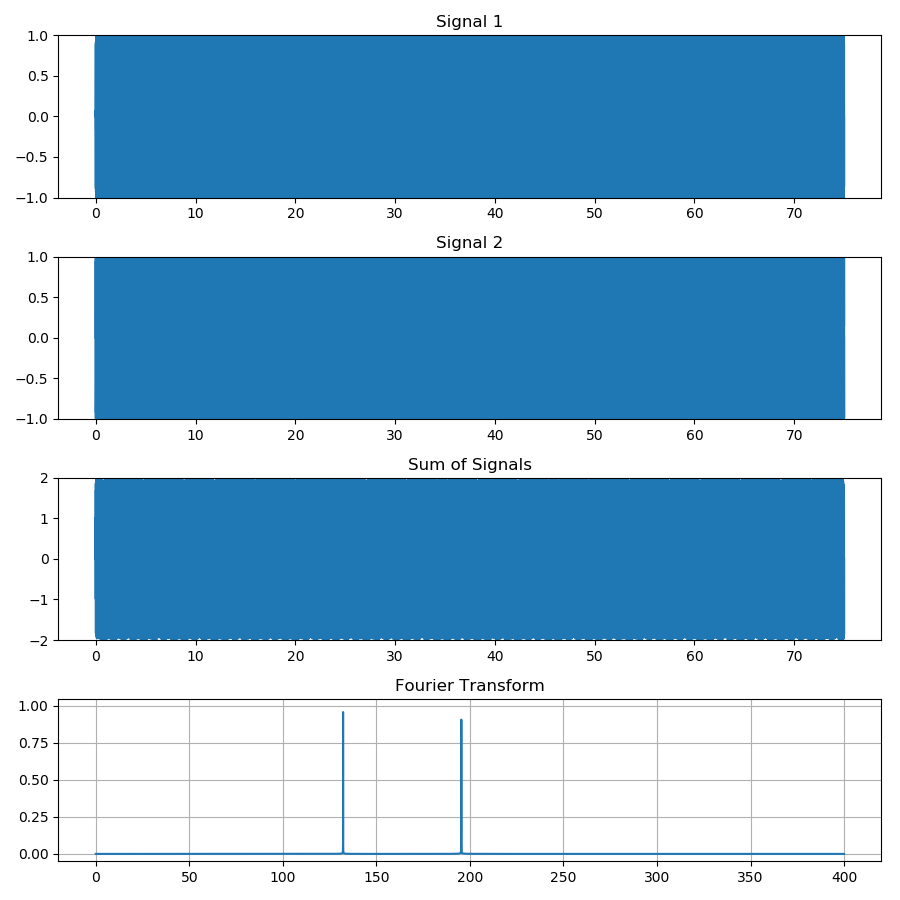

interactive(children=(FloatSlider(value=2.0, description='frequency1', max=400.0), FloatSlider(value=4.0, desc…

In [69]:
from scipy.fftpack import fft
import numpy as np

import matplotlib.pyplot as plt

#import ipywidgets as widgets
from ipywidgets import interact
from ipywidgets import widgets
%matplotlib notebook

from IPython.display import Audio, display

# Number of sample points
N = 60000
# sample spacing
T = 1.0 / 800.0
x = np.linspace(0.0, N*T, N)

y1 = np.sin(50.0 * 2.0*np.pi*x)
y2 = np.sin(80.0 * 2.0*np.pi*x)
y = y1 + y2
yf = fft(y)
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)

plt.figure(figsize=[9,9])

plt.subplot(4,1,1)
plt.title('Signal 1')
line1, = plt.plot(x, y1)
plt.ylim([-1,1])

plt.subplot(4,1,2)
plt.title('Signal 2')
line2, = plt.plot(x, y2)
plt.ylim([-1,1])

plt.subplot(4,1,3)
plt.title('Sum of Signals')
line3, = plt.plot(x, y)
plt.ylim([-2,2])

plt.subplot(4,1,4)
plt.title('Fourier Transform')
yfourier = 2.0/N * np.abs(yf[0:N//2])
line4, = plt.plot(xf, yfourier)
plt.grid()

plt.tight_layout()
plt.show()

Audio(y,rate=framerate)

def update(frequency1 = widgets.FloatSlider(min=0,max=400,step=.1,value=2), 
           frequency2 = widgets.FloatSlider(min=0,max=400,step=.1,value=4)):
    
    framerate = 44100
    
    y1 = np.sin(frequency1 * x * 2 * np.pi)
    line1.set_ydata(y1)
    
    y2 = np.sin(frequency2 * x * 2 * np.pi)
    line2.set_ydata(y2)
    
    y = y1 + y2
    line3.set_ydata(y)
           
      
        
    yf = fft(y)
    yfourier = 2.0/N * np.abs(yf[0:N//2])

    line4.set_ydata(yfourier)    
    
    #data = np.sin(2*np.pi*220*t) + np.sin(2*np.pi*224*t)
    display(Audio(y,rate=framerate, autoplay=True))  
    
interact(update);

# Plot in polar coordinates

## for an intuition of the Fourier Transform, slide the winding frequency and notice that the center of the spiral is not always on the origin

(See link above)

<IPython.core.display.Javascript object>


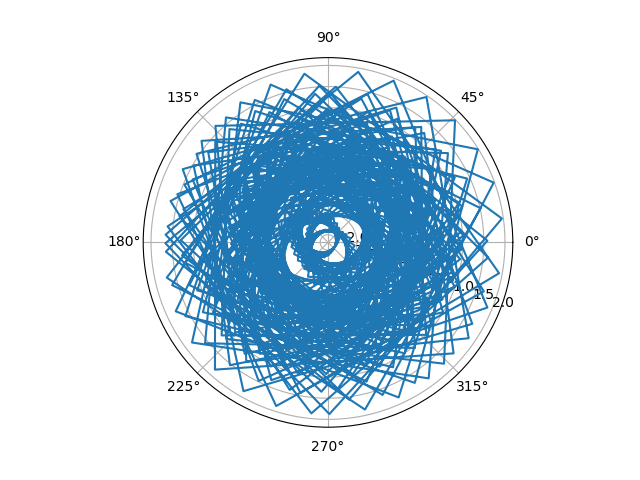

interactive(children=(IntSlider(value=200, description='winding_freq', max=400), Output()), _dom_classes=('wid…

In [56]:
# Number of sample points

N = 600
# sample spacing
T = 1.0 / 800.0
x = np.linspace(0.0, N*T, N)

y1 = np.sin(50.0 * 2.0*np.pi*x)
y2 = np.sin(80.0 * 2.0*np.pi*x)
y = y1 + y2

r = y
theta = x


plt.figure()
ax = plt.subplot(111, projection='polar')
line = ax.plot(theta, r)
ax.set_rmax(2)
ax.set_rticks([0.5, 1, 1.5, 2])  # less radial ticks
ax.set_rlabel_position(-22.5)  # get radial labels away from plotted line
ax.grid(True)

ax.set_title("A line plot on a polar axis", va='bottom')
plt.show()


def update(winding_freq = (0,400)):
    ax.clear()
    ax.plot(theta * 2 * np.pi * winding_freq, r)
  
    
interact(update);

# Let's perform the Fourier Transform ourselves

## For each winding value (1 to 400), keep track of the center of mass of the polar plot

In [53]:
def pol2cart(rho, phi):
    x = rho * np.cos(phi)
    y = rho * np.sin(phi)
    return(x, y)

# create the signal
N = 600
# sample spacing
T = 1.0 / 800.0
x = np.linspace(0.0, N*T, N)
y1 = np.sin(50.0 * 2.0*np.pi*x)
y2 = np.sin(80.0 * 2.0*np.pi*x)
y = y1 + y2

r = y
theta = x


x_means = []
y_means = []

for winding_freq in range(1, 400):
    theta_winding = theta * 2 * np.pi * winding_freq
    
    x, y = pol2cart(r, theta_winding)
    x_mean = x.mean()
    y_mean = y.mean()
    
    x_means.append(x_mean)
    y_means.append(y_mean)

## Plot the average x value and the average y value

<IPython.core.display.Javascript object>


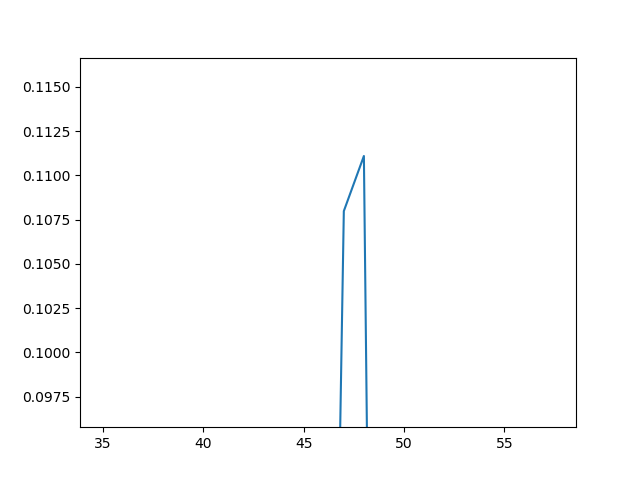

In [55]:
plt.figure()
plt.plot(x_means);

<IPython.core.display.Javascript object>


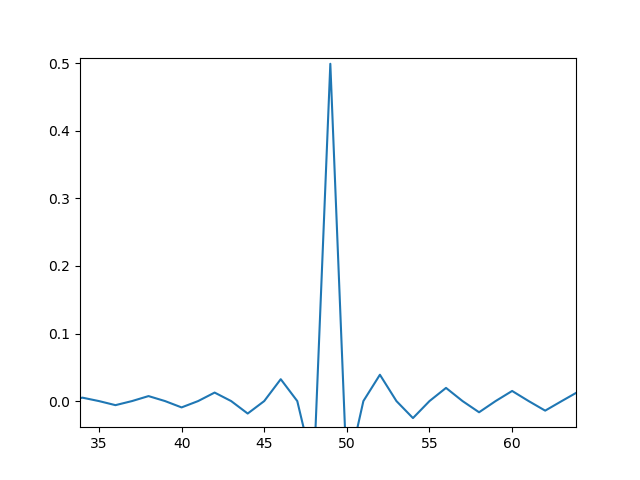

In [57]:
plt.figure()
plt.plot(y_means);